# **Métrica de Schwarzchild: más allá de los agujeros negros**

**Integrantes:**
1. Jerónimo López Gómez C.C. 10017353334
2. Valentina Lobo Ruiz C.C. 1067912559

## **Planteamiento del Problema**

Se busca analizar las propiedades de los agujeros negros, la métrica que los rige que es la métrica de Schwarzschild, su formación y su interacción con otros cuerpos celestes. Estos objetos tienen propiedades muy características y desde esta perspectiva hacen mas comprensible los fenómenos físicos que ocurren alrededor de este tipo de concentraciones de masa. En este trabajo se proponen los siguientes objetivos:

1. Repasar conceptualmente la métrica de Schwarzchild.
2. Plantear teoricamente las trayectorias que deben seguir los cuerpos y la luz en interacción con el campo gravitacional de un agujero negro.
3. Realizar la solución númerica para analizar los efectos de las concentraciones de masa en el espacio-tiempo de Schwarzschild.



In [1]:
#@title **Instalación de EinsteinPy**

#pip install einsteinpy

In [2]:
#Librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import scipy.constants as ctes
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d

import astropy.units as u
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from einsteinpy.coordinates import BoyerLindquistDifferential
from einsteinpy.metric import Kerr


from einsteinpy.geodesic import Timelike
from einsteinpy.plotting.geodesic import GeodesicPlotter

## **Métrica de Schwarzild**

La relatividad general describe la gravedad no como una fuerza, sino como una curvatura del espacio-tiempo causada por la presencia de masa y energía. Las ecuaciones de campo de Einstein, las cuales se desarrollarán más a delante,  son un conjunto de ecuaciones diferenciales que relacionan la distribución de materia y energía con la curvatura del espacio-tiempo.

La métrica de Schwarzschild es una de las soluciones más simples y fundamentales a estas ecuaciones y es especialmente relevante porque describe el espacio-tiempo exterior a objetos como planetas, estrellas, y en particular, agujeros negros no rotantes. Esta métrica se aplica en cualquier región donde la influencia gravitacional de un cuerpo esférico es dominante, y se convierte en la base para estudiar fenómenos como la precesión de las órbitas planetarias, la desviación de la luz por un campo gravitacional (lente gravitacional), y la naturaleza de los agujeros negros.

Un concepto fundamental para entender esta métrica es **derivada covariante** , que se define como a generalización al concepto de derivada en un espacio-tiempo con métrica de Minkowksy o métrica euclidea. A parte de que la derivada subentiende el cambio de un tensor en si mismo, la derivada covariante tiene en cuenta la variación en las direcciones de las coordenadas curvilineas del espacio tiempo curvado por un campo gravitacional, la cuál actuando sobre $A^{ik}$ tensor, se define como

$$ 
A^{ik}_{;l} = \frac{\partial A^{ik}}{\partial x^l} + \Gamma^i_{ml}A^{mk} + \Gamma^k_{ml}A^{im}
 $$


## **Modelado de las trayectorias de partículas**

La métrica de Schwarzild en coordenadas esfericas $(t,r,\theta,\phi)$ esta dada por: [PONER]

$$ds^2=-(1-\frac{2GM}{r})dt^2+(1-\frac{2GM}{r})^{-1}dr^2+r^2d\Omega^2$$

con $d\Omega^2=d\theta^2+sin^2\theta d\phi^2$ y M la masa del objeto gravitacional.

Considerando la ecuación de Einstein en el vacío $R_{\mu \nu}=0$ y la ausencia de energía-momento fuera del objeto, se deduce que el tensor energía-momento $T^{\alpha \beta}$ es un tensor nulo. Esto no significa que el tensor de curvatura de Riemamann sea cero, ni que el espacio-tiempo sea plano como ocurre en la métrica de Minkowski, sino que no hay cambios inmediatos en el volumen ocupado por un objeto o conjunto de partículas mientras se mueven a lo largo de geodésicas en el espacio-tiempo curvo.

Por otro lado, tenemos la ecuación de campo de Einstein está dada por: [4]

$$R_{\mu \nu} - \frac{1}{2} R g_{\mu \nu} - \Lambda g_{\mu \nu} = \frac{8 \pi G}{c^4} T_{\mu \nu}$$


De lo anterior se sigue que:

$$R_{\mu \nu} - \frac{1}{2} R g_{\mu \nu} = 0 \Leftrightarrow R_{\mu \nu} g^{\mu \nu} - \frac{1}{2} R g_{\mu \nu} g^{\mu \nu} = 0 \Leftrightarrow R^{\mu}_{\mu} - \frac{1}{2} R \delta^{\mu}_{\mu} = 0$$

$$\Leftrightarrow R - \frac{1}{2} R (4) = 0 \Leftrightarrow R = 0$$

A medida que nos alejamos del objeto masivo, los efectos gravitacionales disminuyen, llevando el espacio-tiempo a una métrica de Minkowski. Como se supone que el objeto a tratar es esférico, se debe usar la métrica para espacios-tiempos planos en coordenadas esféricas $(t,r,\theta  ,\phi )$.

$$g = \left( \begin{array}{ccc}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -r^2 & 0 \\
0 & 0 & 0 & -r^2 \sin^2{\theta  } \\
\end{array} \right) $$

Esta será la métrica para un cuerpo lo suficientemente alejado del objeto generador del campo gravitacional.

Sin embargo, en el caso en que se está lo suficientemente cerca pero fuera del objeto productor del campo, la métrica no corresponderá a la de un espacio-tiempo plano, sino a uno curvo. Usando el límite de bajas velocidades y gravedad débil, la métrica  reproduce la gravedad newtoniana.

$$g = \left( \begin{array}{ccc}
1 - \frac{2GM}{r c^2} & 0 & 0 & 0 \\
0 & -(1 - \frac{2GM}{r c^2})^{-1} & 0 & 0 \\
0 & 0 & -r^2 & 0 \\
0 & 0 & 0 & -r^2 \sin^2{\theta  } \\
\end{array} \right) $$

Esta es la métrica encontrada por Schwarzschild que resuelve y cumple las condiciones del problema planteado. Donde $ \frac{2GM}{c^2} = r_s$ se la conoce como radio de Schwarzschild u horizonte de eventos.

Para hallar las diferentes trayectorias del sistema se debe resolver la ecuación geodésica $$\frac{d^2 x^\sigma }{d \tau^2} +  \Gamma_{\mu \nu}^{\sigma }\frac{d x^\mu}{d \tau  } \frac{d x^\nu}{d \tau} = 0$$

A continución se graficarán las trayectorias que recorren dos objetos cuando se acercan a un agujero negro.

In [3]:
#Solución de las derivadas parciales

def partial_derivative(funcion,variable, punto,*argumentos):
    """Función cálculo derivadas parciales de función de varias variables
    respecto a una variable dada en punto especifico."""
    punto = punto.T
    x0 = punto[variable]

    def funcion1var(x,*argumentos): 

        X = (punto[:variable], np.array([x]), punto[(variable + 1):])

        return funcion(np.concatenate(X) ,*argumentos)

    return derivative(funcion1var, x0, args = argumentos)


def g(vector,index):
    """Esta función dos da los elementos del tensor métrico"""
    t,r,theta,phi = vector

    if index[0] != index[1]: return 0

    else:
        if index[0]== 0 and index[1] == 0: return 1-(2*G*M/(r*c**2))
        elif index[0]== 1 and index[1] == 1: return -(1-(2*G*M/(r*c**2)))**-1
        if index[0]== 2 and index[1] == 2: return -r**2
        elif index[0]== 3 and index[1] == 3: return - (r*np.sin(theta))**2


def Partial_gab_c(variable,punto,index):
    """Esta función nos la derivada parcial de la métrica"""
    Argumentos = index

    return partial_derivative(g, variable, punto, Argumentos)


def christoffel_ikl_(punto,indices):
    """Esta función hallar los simbolos de Christoffel"""
    i,k,l = indices

    def val(m):
        g_mk_l = Partial_gab_c(l,punto,(m,k))
        g_ml_k = Partial_gab_c(k,punto,(m,l))
        g_kl_m = Partial_gab_c(m,punto,(k,l))
        return  0.5*g(punto,(i,m))*(g_mk_l + g_ml_k + g_kl_m )

    return val(0)+val(1)+val(2)+val(3)


def RightSide(S,i):
    """Esta función nos da el lado derecho de la ecuación de la Geodesica"""
    U = S[:4]
    X = S[4:]

    return np.sum( [-christoffel_ikl_(X,(i,k,l))*U[k]*U[l]  for k in range(0,4) for l in range(0,4) ]   )

def F(t,S):
    U = S[:4]
    X = S[4:]
    f = np.array([RightSide(S,i) for i in range(0,4)])

    return np.concatenate((f,U))

In [10]:
#PARAMETROS 
c = 1 # Velocidad de la luz
G = 1 # Constante gravitacional
M = 100 # Masa 

gamma = lambda V: 1/np.sqrt(1 - (np.linalg.norm(V)/c)**2) #  factor de Lorentz
e = 0.05 # procentaje de la vel. de la luz a la que viaja el objeto
v0 = 3*[e*c*np.sqrt(3)**-1] # velocidad inicial del objeto

t0 = 0 # Tiempo propio inicial
tf = 15 # Tiempo propio final
n_puntos = 300
t_eval = np.linspace(t0, tf, n_puntos)
t_span = (t0, tf)
rs = 2*G*M/c**2 # Radio de Schwarzschild

#CONDICIONES INCIALES

r0 = 2
teta0 = 0
phi0 = 0

C:\Users\Valentina\AppData\Local\Temp\ipykernel_7984\4119101900.py:15: DeprecationWarning:

scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools



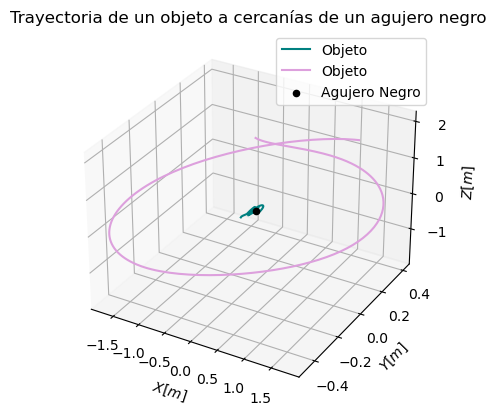

In [12]:
#@title Solución a la ecuación de movimiento
X0 =  np.array([t0, r0, teta0, phi0])
U0 = np.array([c*gamma(v0), *v0])
S0 = np.concatenate((U0,X0))

Solve  = solve_ivp(F,t_span,S0,dense_output=True,t_eval = t_eval)

# Gráfica de solución en coordenadas cartesianas
t = Solve.t
Sol = Solve.y

UU = Sol[:4,:] # 4-velocidad
XX = Sol[4:,:] # 4-posición

# Puntos correspondientes a r, theta, phi

rr = XX[-4,:]
teta_teta = XX[-3,:]
phi_phi = XX[-2,:]

rr_ = XX[-3,:]
teta_teta_ = XX[-2,:]
phi_phi_ = XX[-1,:]

# Coordenadas x, y, z en función de r,theta,phi).
X_points = lambda R,teta,phi: R*np.sin(teta)*np.cos(phi)
Y_points = lambda R,teta,phi: R*np.sin(teta)*np.sin(phi)
Z_points = lambda R,teta,phi: R*np.cos(teta)

fig = plt.figure()

ax = plt.axes(projection ='3d')
ax.set_title('Trayectoria de un objeto a cercanías de un agujero negro')


x = X_points(rr,teta_teta,phi_phi)
y = Y_points(rr,teta_teta,phi_phi)
z = Z_points(rr,teta_teta,phi_phi)

x_ = X_points(rr_,teta_teta_,phi_phi_)
y_ = Y_points(rr_,teta_teta_,phi_phi_)
z_ = Z_points(rr_,teta_teta_,phi_phi_)

ax.plot3D(x, y, z, '-', color = 'teal', label="Objeto")
ax.plot3D(x_, y_, z_, '-', color = 'plum', label="Objeto")
ax.scatter3D([0],[0],[0], 'o', color = "Black", label="Agujero Negro") # Agujero negro en origen.
plt.legend()
ax.set_xlabel('$X [m]$')
ax.set_ylabel('$Y [m]$')
ax.set_zlabel('$Z [m]$')
plt.show()

## **Precesión del perihelio de mercurio**


Mercurio al ser el planeta más cercano al sol siente con mayor intensidad los aspectos gravitacionales de este, al punto que su movimiento se desvía del predicho por métodos clásicos. Esto fue un gran problema para los astronomos del siglo XIX. Estos observaban que el perihelio de Mercurio, siendo el perihelio la ubicación más cercana a la estrella, se corre un poco, es decir, la orbita del planeta precesa. Este problema para los físicos clásicos, encontró su solución gracias a la teoría de la relatividad general.

La presencia del Sol, con su gran masa, deforma el espacio-tiempo de tal manera que las trayectorias de los planetas no son exactamente las predichas por la mecánica clásica. Esta deformación puede ser descrita por medio de la métrica de Schwarzild que describe el espacio-tiempo alrededor de una masa esférica no rotante, como el Sol.

Con el fin de simplificar el problema utilizaremos la métrica de Schwarzschild en coordenadas esféricas $(t, r,\theta,\phi)$ para un objeto en el plano ecuatorial $\theta = \pi/2$ de tal manera que la métrica queda como:

$$ds^2 = -\left(1 - \frac{2GM}{c^2r}\right)c^2dt^2 + \left(1 - \frac{2GM}{c^2r}\right)^{-1}dr^2 + r^2 d\phi^2$$

Como se mencionó anteriormente, para conocer la trayectoria de un cuerpo en un campo gravitacional es necesario resolver la ecuación de la geodésica. No obstante, se pueden aprovechar las simetrías de la métrica para encontrar las constantes de movimiento. Por un lado, tenemos que el momento angular se conseva, con lo cual:
$$r^2 \frac{d\phi}{d\tau} = L = \text{constante}$$

$$\frac{d\phi}{d\tau} = \frac{L}{r^2}$$

Por otro lado, con la conservación de la energía:

$$\left(1 - \frac{2GM}{c^2r}\right)c^2 \frac{dt}{d\tau} = E = \text{constante}$$

$$\frac{dt}{d\tau} = \frac{E}{c^2 \left(1 - \frac{2GM}{c^2r}\right)}
$$

Con el objetivo de encontrar la ecuación que describa el movimiento radial, es decir, la trayectoria se utiliza la condición $ds^2 = -c^{2}d\tau^2$, que aplicando en la métrica de la siguiente forma $(\frac{ds}{d\tau})^2 = -c^2$ queda como:

$$-\left(1 - \frac{2GM}{c^2r}\right)c^2 \left(\frac{dt}{d\tau}\right)^2 + \left(1 - \frac{2GM}{c^2r}\right)^{-1} \left(\frac{dr}{d\tau}\right)^2 + r^2 \left(\frac{d\phi}{d\tau}\right)^2 = -c^2
$$

Sustituyendo $\frac{dt}{d\tau}$ y $\frac{d\phi}{d\tau}$

$$-\frac{E^2}{\left(1 - \frac{2GM}{c^2r}\right)c^2} + \left(1 - \frac{2GM}{c^2r}\right)^{-1} \left(\frac{dr}{d\tau}\right)^2 + \frac{L^2}{r^2} = -c^2
$$

Multiplicando $(1 - \frac{2GM}{c^2 r})$

$$\left(\frac{dr}{d\tau}\right)^2 = E^2 - \left(1 - \frac{2GM}{c^2r}\right)\left(\frac{L^2}{r^2} + c^2\right)$$

Ahora realizamos el cambio de variable $u = \frac{1}{r}$, y derivando respecto a $\phi$ usando $\frac{d\phi}{d\tau} = \frac{L}{r^2} = L u^2$

$$\frac{d}{d\tau} = \frac{d\phi}{d\tau} \frac{d}{d\phi} = L u^2 \frac{d}{d\phi}$$

Sustituyendo en la ecuación para $r(\tau)$, obtenemos:

$$L^2 \left(\frac{du}{d\phi}\right)^2 + u^2 = \frac{E^2}{L^2} - u^2 \left(1 - \frac{2GMu}{c^2}\right) - \frac{GMu}{c^2} \left(1 - \frac{2GMu}{c^2}\right)
$$

$$\frac{d^2u}{d\phi^2} + u = \frac{GM}{L^2} + \frac{3GM}{c^2} u^2$$

La anterior es una ecuación no lineal que puede resolverse aproximadamente considerando el término relativista como una pequeña perturbación. La solución es para $u(\phi)$ se puede escribir como:
$$u(\phi) = \frac{GM}{L^2} \left[1 + e \cos\left(\phi - \delta\phi\right)\right]$$

Donde $\delta \phi$ es un pequeño término adicional que depende del término relativista $\frac{3GM}{c^2} u^2$, y causa la precesión de la órbita. Para finalizar, volvemos a la variable original, es decir $r(\phi)$.

$$r(\phi) = \frac{L^2}{GM} \frac{1}{1 + e \cos\left(\phi - \delta\phi\right)}$$

Este resultado muestra cómo el radio $r$ de la órbita varía con el ángulo $𝜙$, tomando en cuenta la corrección relativista que introduce la precesión del perihelio.


Una vez obtenido este resultado de forma analítica, procedemos a solucionar el problema de la precesión de la órbita de mercurio de forma múmero. Para comenzar se graficará la orbita de Mercurio a lo largo de varios periodos pero con la formulación de la mecánica clásica.

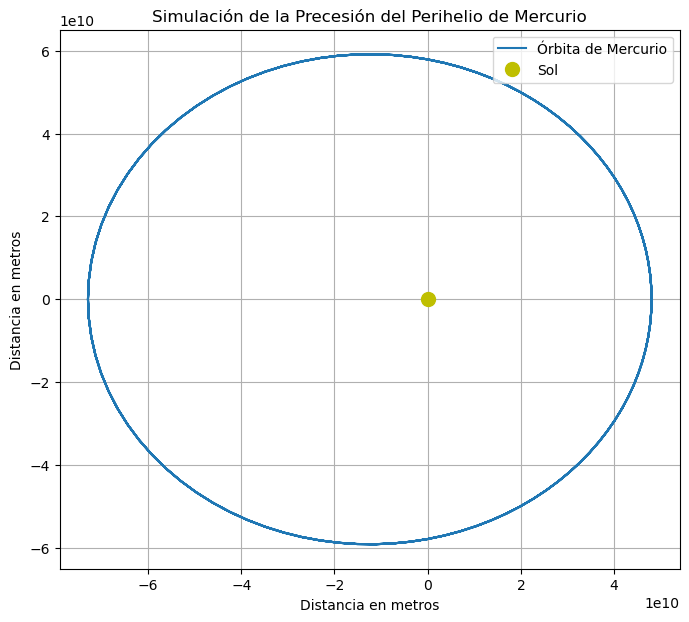

In [30]:
# Parámetros orbitales de Mercurio
G = 6.67430e-11  # Constante gravitatoria en m^3 kg^-1 s^-2
M_sol = 1.989e30  # Masa del Sol en kg
M_mercurio = 3.3011e23  # Masa de Mercurio en kg
a = 57.9e9  # Semieje mayor en metros
T = 88.0  # Período orbital en días
e = 0.2056  # Excentricidad
# Convertir el período a segundos


# Calcular la velocidad orbital media
v_media = 2 * np.pi * a / T

# Simulación durante varios períodos orbitales
num_periodos = 5
dt = T / 100  # Paso de tiempo
pasos = int(T * num_periodos / dt)
posiciones_x = []
posiciones_y = []

for paso in range(pasos):
    t = paso * dt
    theta = 2 * np.pi * t / T  # Ángulo actual en la órbita
    # Posición de Mercurio en su órbita elíptica
    r = a / (1 + e * np.cos(theta))
    x = r * np.cos(theta )
    y = r * np.sin(theta)
    
    posiciones_x.append(x)
    posiciones_y.append(y)

# Visualización
plt.figure(figsize=(8, 7))
plt.plot(posiciones_x, posiciones_y, label='Órbita de Mercurio')
plt.plot(0, 0, 'yo', markersize=10, label='Sol')  # Posición del Sol
plt.xlabel('Distancia en metros')
plt.ylabel('Distancia en metros')
plt.legend()
plt.grid()
plt.title('Simulación de la Precesión del Perihelio de Mercurio')
plt.show()

En la anterior gráfica podemos observar como a lo largo de 5 periodos la órbita Mercurio no varía, es decir, no se presenta ningún corrimiento del perihelio. Ahora, veamos númericamente como es trayectoria de este planeta al agregar la corrección relativista en su movimiento.

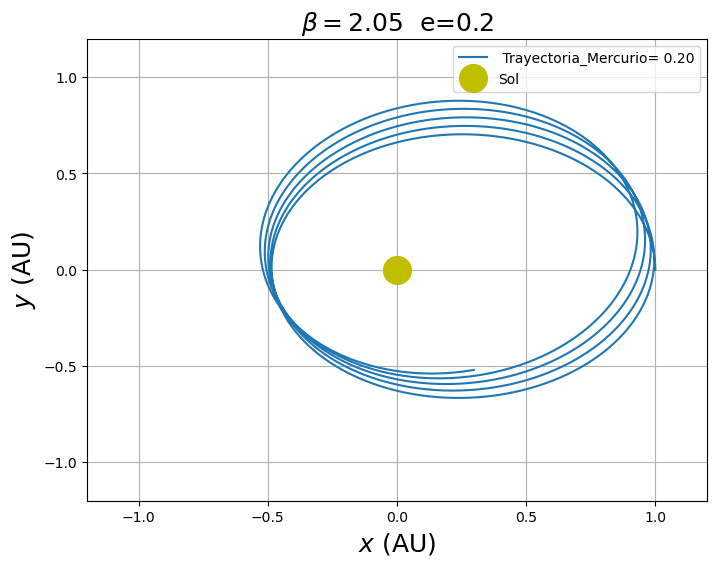

In [26]:
def inicializar(_beta=2.05, _e=0., _m= 4*(np.pi**2), _dt=0.001, _time=3):
    m=_m
    e=_e
    x, y=[1.],[0.]
    vx, vy=[0],[np.sqrt(m)*np.sqrt((1.-e)/(1.+e))]
    beta=_beta
    dt=_dt
    time= _time
    n=int(time/dt)
    return x, y, vx, vy, m, e, beta, dt, time, n

def calcular(x, y, vx, vy, m, beta, dt, n):
    for i in range(n):
        r=np.sqrt(x[-1]**2+y[-1]**2)
        vx.append(vx[-1]+dt*(-m*x[-1]/r**(beta+1.)))
        vy.append(vy[-1]+dt*(-m*y[-1]/r**(beta+1.)))
        x.append(x[-1]+vx[-1]*dt)
        y.append(y[-1]+vy[-1]*dt)
    return x, y

def plot_trajectory(x, y, e):
    plt.plot(x,y,markersize=0.5,label=' Trayectoria_Mercurio= %.2f'%e)
    plt.plot([x[-1]],[y[-1]],markersize=8)
    plt.plot([0],[0],'oy',markersize=20, label = "Sol")
    plt.grid()
    plt.legend()

def precession_rate(x, y, dt):
    x_critical=0
    y_critical=0
    t_critical=0
    for i in range(len(x)-2):
        r_i=np.sqrt(x[i]**2+y[i]**2)
        r_i1=np.sqrt(x[i+1]**2+y[i+1]**2)
        r_i2=np.sqrt(x[i+2]**2+y[i+2]**2)
        if r_i<r_i1 and r_i1>r_i2:
            x_critical=x[i+1]
            y_critical=y[i+1]
            t_critical=dt*(i+1)
            break
    rate = np.arctan(y_critical/x_critical)/t_critical
    return rate

# Calcular la trayectoria del planeta con diferentes excentricidades
for i in range(1,2):
    fig=plt.figure(figsize=(8,6))
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel(r'$x$'+' (AU)',fontsize=18)
    plt.ylabel(r'$y$'+' (AU)',fontsize=18)
    plt.title(r'$\beta=2.05$'+'  '+'e='+str(i*0.2),fontsize=18)
    x, y, vx, vy, m, e, beta, dt, time, n = inicializar(2.05,i*0.2)
    x, y = calcular(x, y, vx, vy, m, beta, dt, n)
    plot_trajectory(x, y, i*0.2)
    plt.show()



Por efectos de practicidad se escogieron unidades naturales, sin embargo, se puede observar como el perihelio va cambiando su posición a medida que se completan los periodos dando esa apariencia de espiral.

La excentricidad de la orbita de Mercurio es bien conocida con un valor de 0.2, sin embargo la excentricidad es uno de los parametros que influyen en la trayectoria de los planeta, es por esto que ahora veremos la razón de cambio de la precesión según la excentricidad.

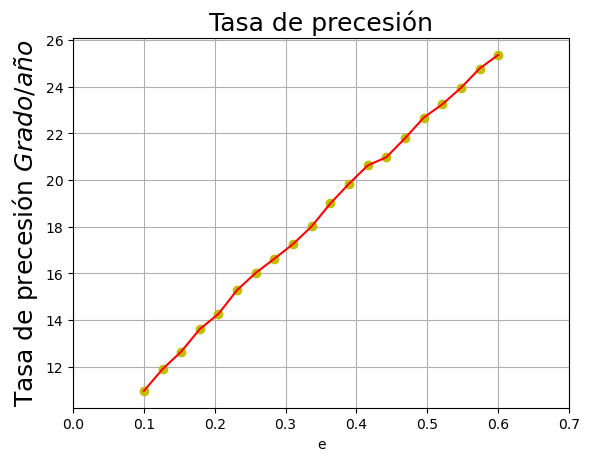

In [28]:
# Cambiar la excentricidad y obtener la correspondiente tasa de precesión
e=[]
rate=[]
for i in np.linspace(0.1,0.6,20):
    x, y, vx, vy, m, e_val, beta, dt, time, n = inicializar(2.05,i)
    x, y = calcular(x, y, vx, vy, m, beta, dt, n)
    e.append(i)
    rate.append(180/np.pi*precession_rate(x, y, dt))

plt.xlim(-0,0.7)
plt.xlabel(r'e')
plt.ylabel(r'Tasa de precesión '+r'$ Grado/año $',fontsize=18)
plt.title(r'Tasa de precesión',fontsize=18)
plt.plot(e,rate,'oy')
plt.plot(e,rate,'-r')
plt.grid()
plt.show()

Se puede observar que aumenta la tasa de precesión de la orbita de Mercurio a medida que aumenta la excentricidad de la orbita de un planeta.

## **Conclusiones**